### FITBIT FITNESS ANALYSIS

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore') 
pd.set_option("display.precision", 2)
matplotlib.style.use('seaborn')
import datetime
import math


### About the data

This Kaggle data set
contains personal fitness tracker data from thirty fitbit users. This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.
 It includes information about daily, hourly and minute activity, steps, and heart rate that can be used to explore users’ habits.

Data is stored in multiple CSV files, according to the frequency and type of the collected information.



### Major Case study goals

* For how long do users wear their product every day? How many of theese hours are spend on activitiy?
* On what days of the week and hours of the day are users more active?
* Does the amount of activity affect heart rate at night and time spent in bed being awake?
* How does users' BMI affect amount of calories burned?








<a id="data_input"></a>
# Data Input


### Reading files







In [3]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_sleep = pd.read_csv("sleepDay_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
weight_info = pd.read_csv("weightLogInfo_merged.csv")
heartrate_seconds = pd.read_csv("heartrate_seconds_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")

The first step before starting any form of EDA is to check if the data types are correct.

In [33]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [34]:
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.6+ KB


In [35]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 431.7+ KB


In [36]:
weight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.5+ KB


In [37]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 47.4+ MB


In [38]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [39]:
daily_sleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [40]:
hourly_steps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [41]:
weight_info.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [42]:
heartrate_seconds.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [43]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.40e+02,940.00,940.00,940.00,940.00,940.00,940.00,940.00,9.40e+02,940.00,940.00,940.00,940.00,940.00
mean,4.86e+09,7637.91,5.49,5.48,0.11,1.50,0.57,3.34,1.61e-03,21.16,13.56,192.81,991.21,2303.61
std,2.42e+09,5087.15,3.92,3.91,0.62,2.66,0.88,2.04,7.35e-03,32.84,19.99,109.17,301.27,718.17
min,1.50e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,2.32e+09,3789.75,2.62,2.62,0.00,0.00,0.00,1.95,0.00e+00,0.00,0.00,127.00,729.75,1828.50
50%,4.45e+09,7405.50,5.24,5.24,0.00,0.21,0.24,3.36,0.00e+00,4.00,6.00,199.00,1057.50,2134.00
75%,6.96e+09,10727.00,7.71,7.71,0.00,2.05,0.80,4.78,0.00e+00,32.00,19.00,264.00,1229.50,2793.25
max,8.88e+09,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,1.10e-01,210.00,143.00,518.00,1440.00,4900.00


In [44]:
heartrate_seconds.describe()

,Id,Value
count,2.48e+06,2.48e+06
mean,5.51e+09,7.73e+01
std,1.95e+09,1.94e+01
min,2.02e+09,3.60e+01
25%,4.39e+09,6.30e+01
50%,5.55e+09,7.30e+01
75%,6.96e+09,8.80e+01
max,8.88e+09,2.03e+02


## Data Exploration using Visualizations:

Data analysis using graphs and charts prove to be very useful to look at your data. 

We shall be using Matplotlib and Seaborn for our analysis.

### Histograms
Let's start by using histograms to see if the data follows a particular kind of distribution.

Since we have a lot of features, let's extract a subset for our analysis.

In [45]:
df1 = daily_activity[['TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','SedentaryMinutes','Calories']]

array([[<AxesSubplot:title={'center':'TotalSteps'}>,
        <AxesSubplot:title={'center':'TotalDistance'}>,
        <AxesSubplot:title={'center':'VeryActiveDistance'}>],
       [<AxesSubplot:title={'center':'ModeratelyActiveDistance'}>,
        <AxesSubplot:title={'center':'LightActiveDistance'}>,
        <AxesSubplot:title={'center':'VeryActiveMinutes'}>],
       [<AxesSubplot:title={'center':'FairlyActiveMinutes'}>,
        <AxesSubplot:title={'center':'SedentaryMinutes'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

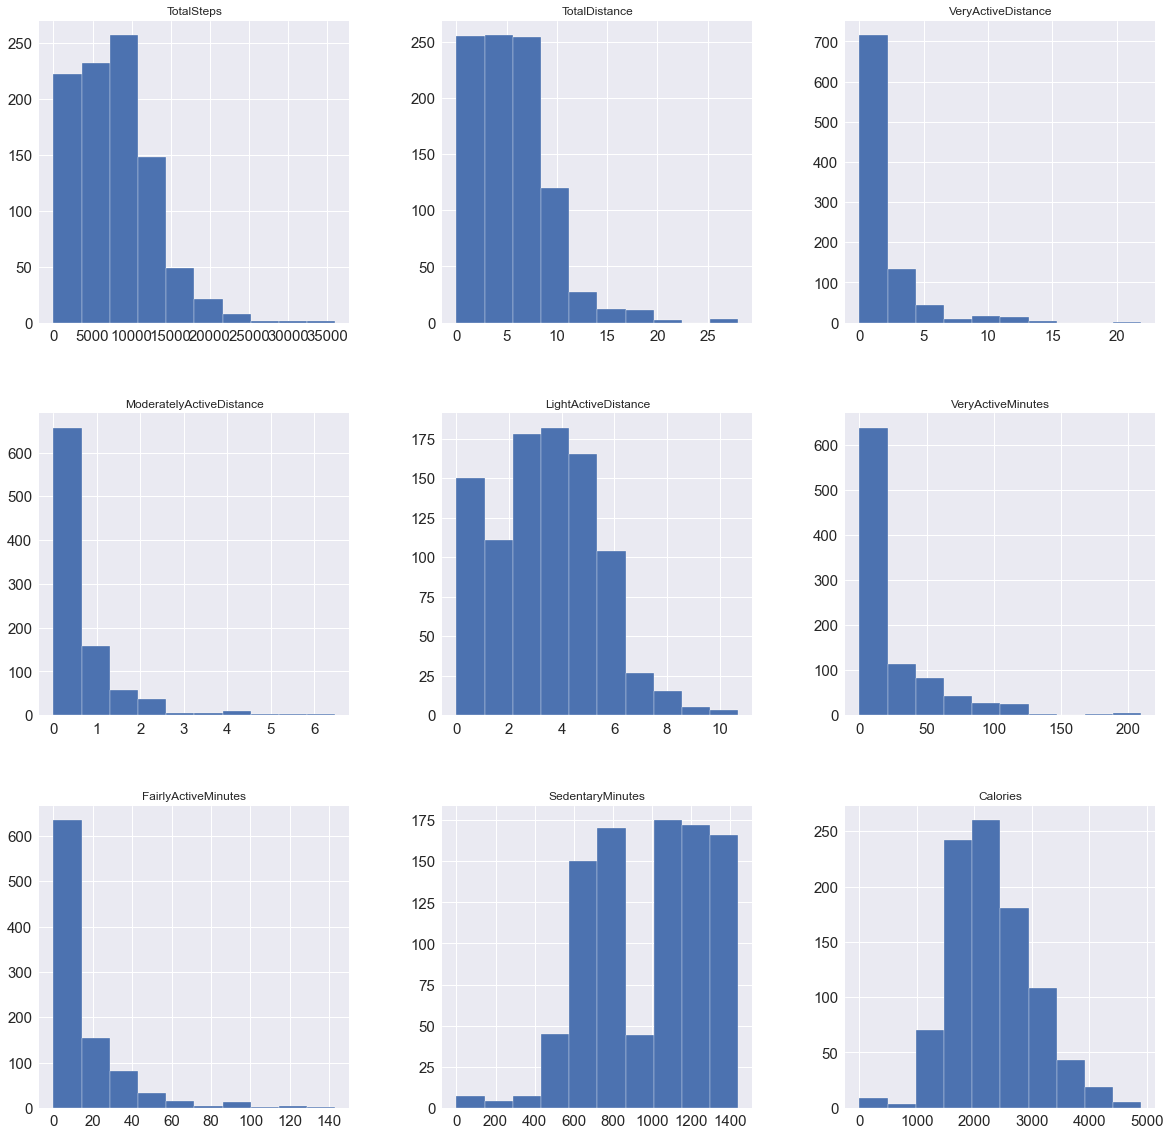

In [46]:
import warnings
warnings.filterwarnings('ignore')        
df1.hist(figsize=(20,20), bins = 10, xlabelsize=15, ylabelsize= 15)

As seen from the above plots, a few of the variables  follows a normal distribution. It would be interesting to carry out some form of hypothesis testing as well if the distributions behave the same on both weekdays and weekends; or there would be a significant difference between them.

### Scatter plots and Correlation Plots/Matrix:
Since most of the variables in our dataset are numerical, it would be interesting to plot scatter plots and see how the variables interact with one another.

In [47]:
pplot = ['TotalSteps','TotalDistance','TrackerDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']

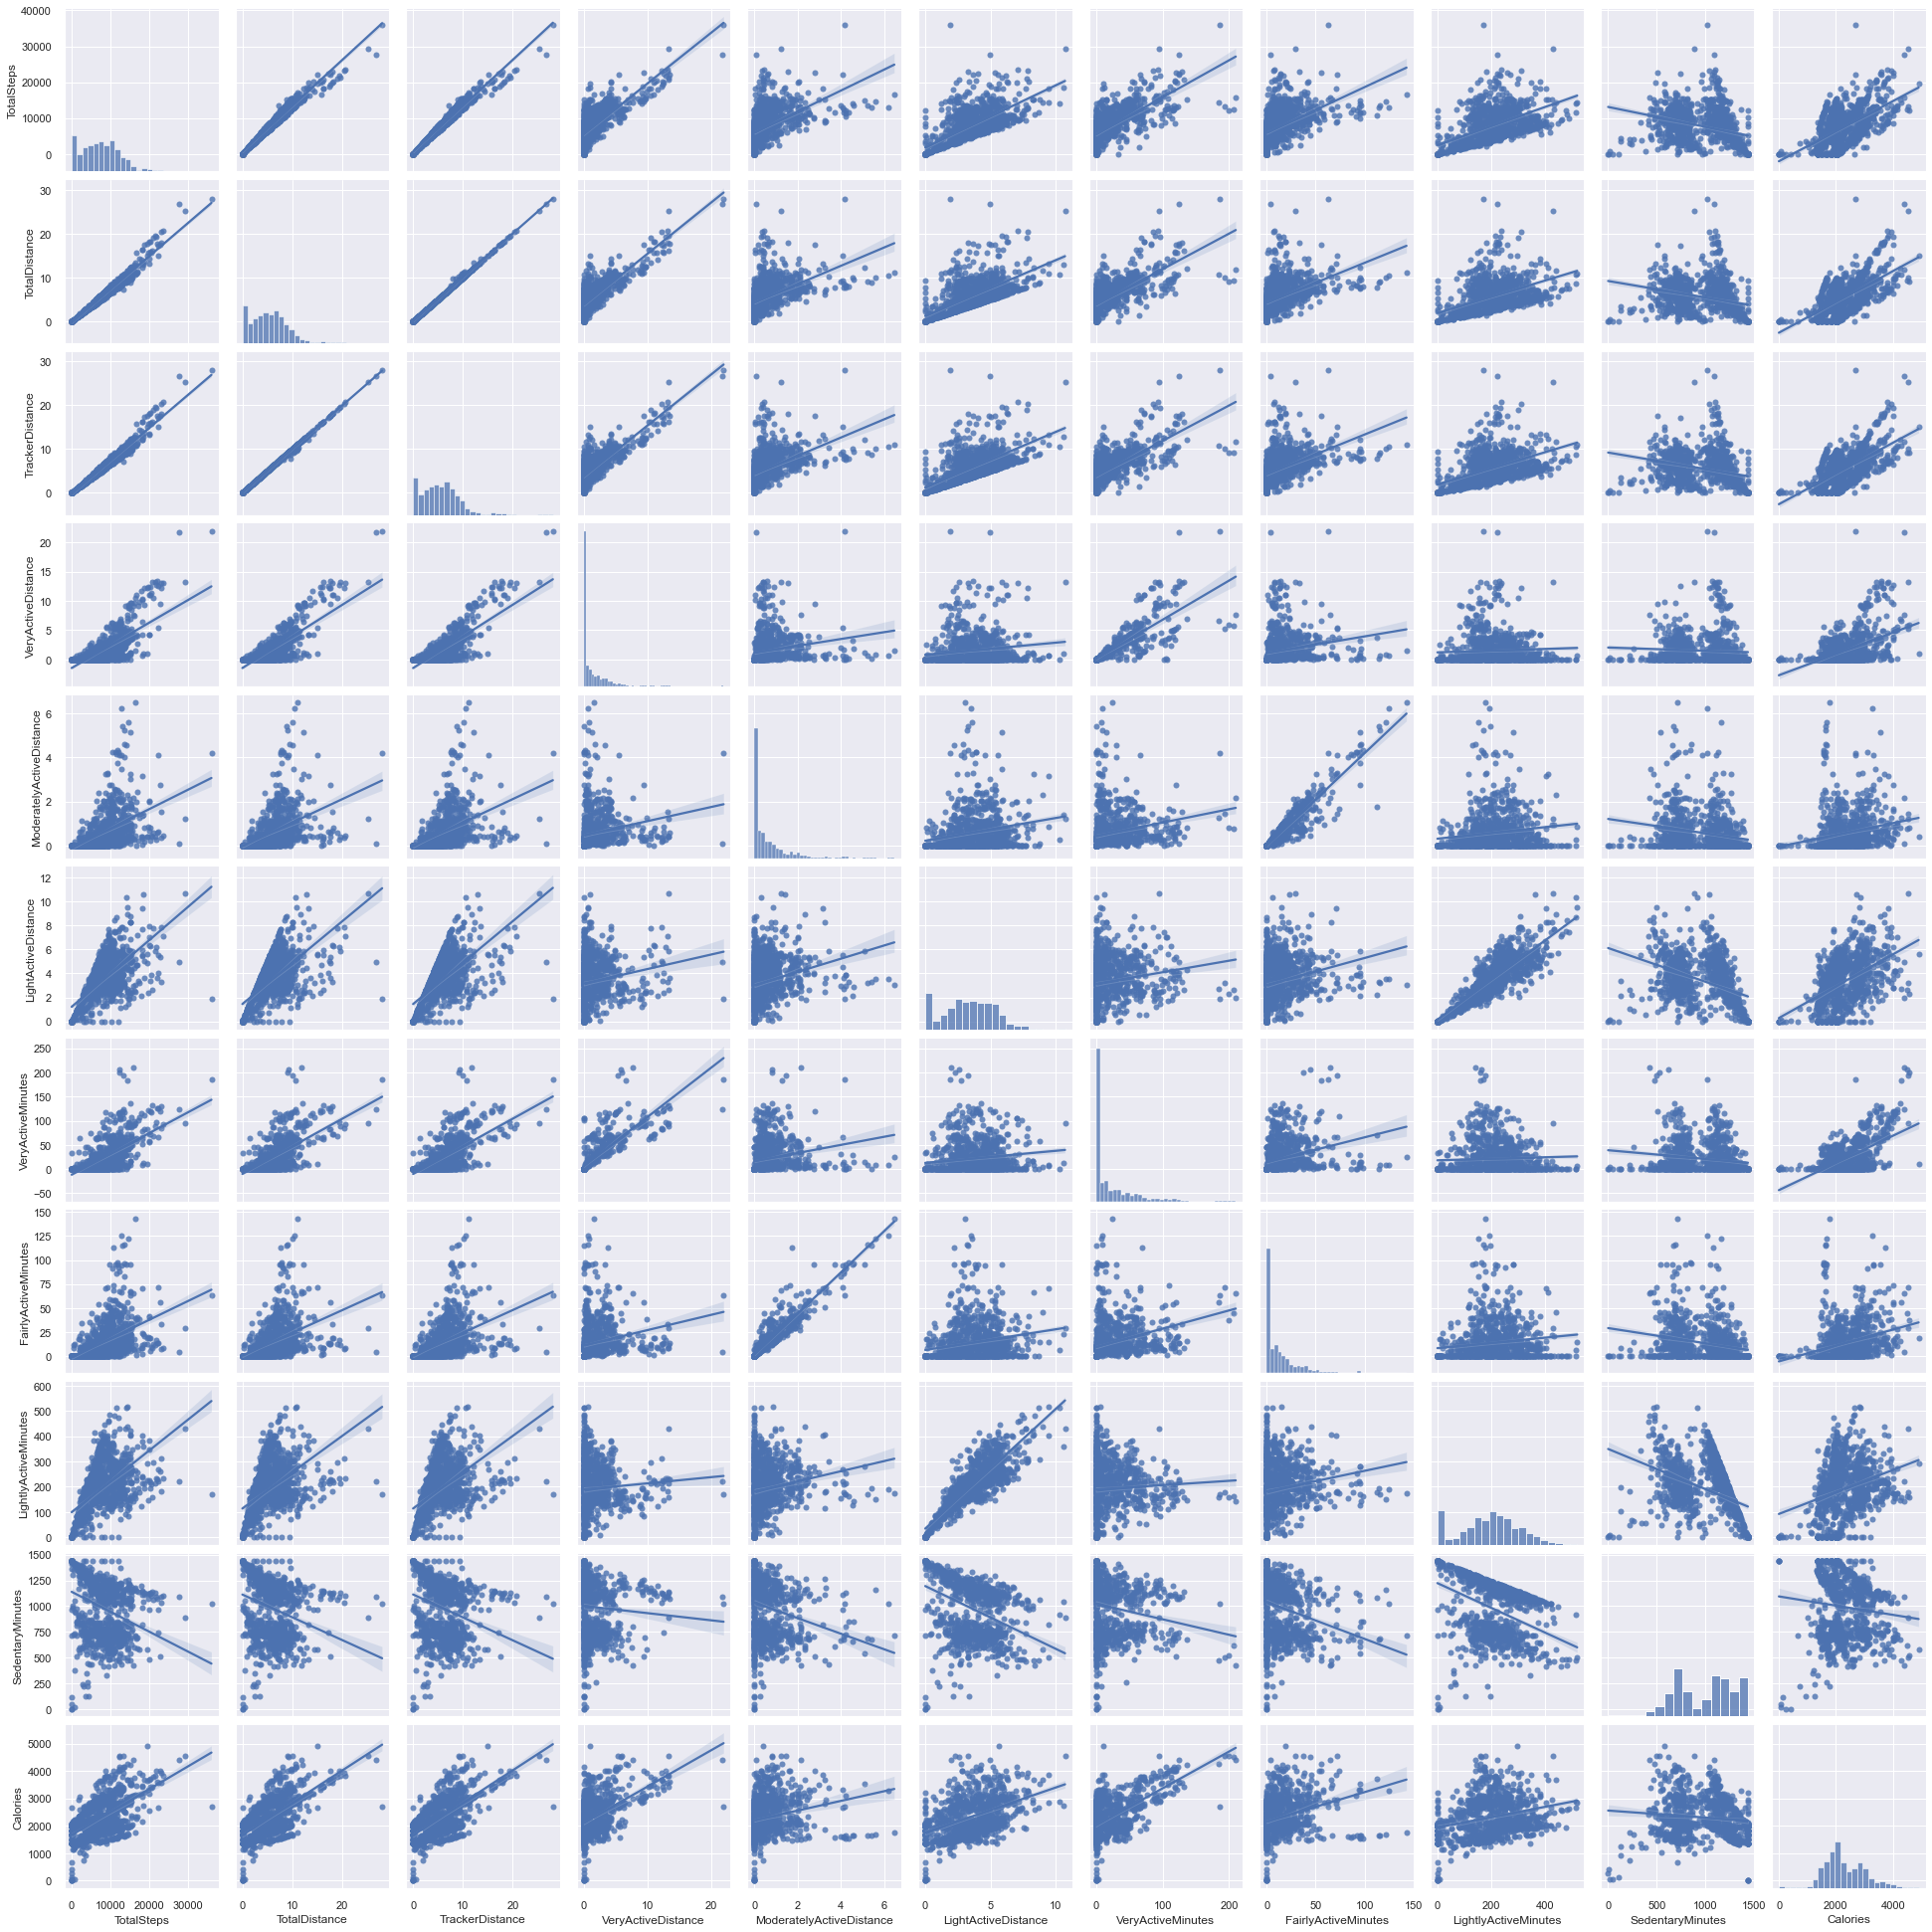

In [48]:
sns.set()
sns.pairplot(daily_activity[pplot], kind = 'reg')

Regression plots serve as a better tool because along with the scatter plots, we get a best fit line which shows the trend of the data points. Also, if we see that this trend line passes through majority of the points, we can assume that we can use this data for a good predictive model as well.

Some of the notable insights from the above plots are:

    
* Calories Burned is directly related to  the distance . This means **the more I stay active, the more calories I burn, which ultimately results in a lower RHB.**

    
* Heart beat is highly correlated to 'Minutes Sedentary'.

In [49]:
df1.corr()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.00,0.99,0.74,0.51,0.69,0.67,0.50,-0.33,0.59
TotalDistance,0.99,1.00,0.79,0.47,0.66,0.68,0.46,-0.29,0.64
VeryActiveDistance,0.74,0.79,1.00,0.19,0.16,0.83,0.21,-0.06,0.49
ModeratelyActiveDistance,0.51,0.47,0.19,1.00,0.24,0.23,0.95,-0.22,0.22
LightActiveDistance,0.69,0.66,0.16,0.24,1.00,0.15,0.22,-0.41,0.47
VeryActiveMinutes,0.67,0.68,0.83,0.23,0.15,1.00,0.31,-0.16,0.62
FairlyActiveMinutes,0.50,0.46,0.21,0.95,0.22,0.31,1.00,-0.24,0.30
SedentaryMinutes,-0.33,-0.29,-0.06,-0.22,-0.41,-0.16,-0.24,1.00,-0.11
Calories,0.59,0.64,0.49,0.22,0.47,0.62,0.30,-0.11,1.00


A correlation matrix allows one to see the relationship between different numerical variables at a glance. We can also find the correlation for a single variable of interest. For e.g:

<AxesSubplot:>

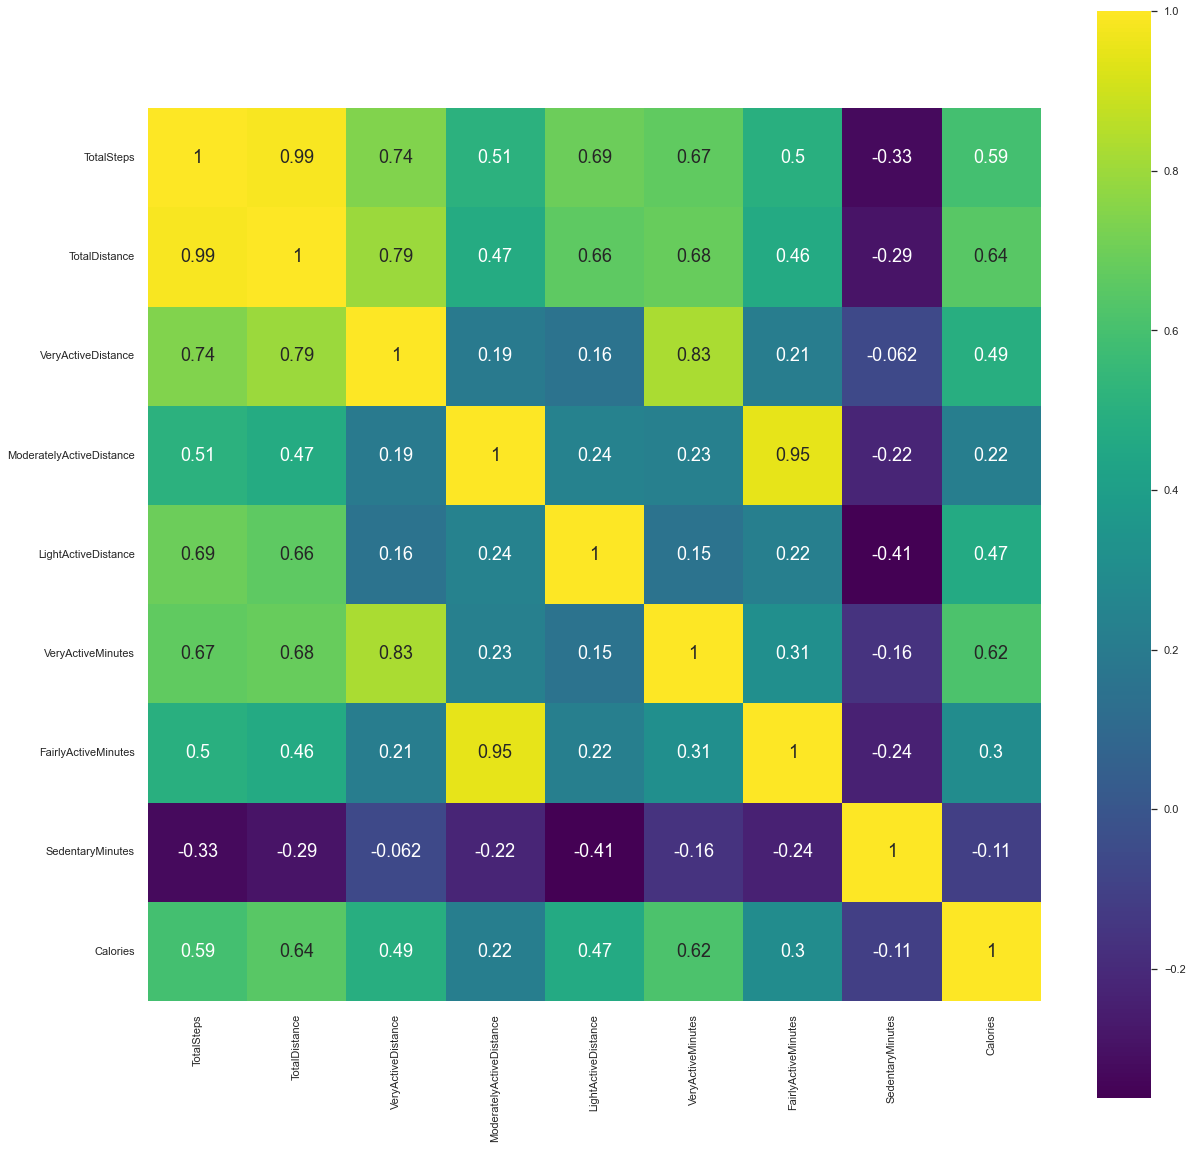

In [50]:
corr = df1.corr()
plt.figure(figsize = (20,20))

sns.heatmap(corr, annot= True, robust=True,
            annot_kws= {"size" : 18},cmap='viridis',
            square= True)

### Box-Plots
Box plots help us to combine both numerical and categorical variables and understand how they relate to each other. The best thing about using box plots is that we can directly get an understanding of our data distribution (the mean, the spread, left/right skewed etc).

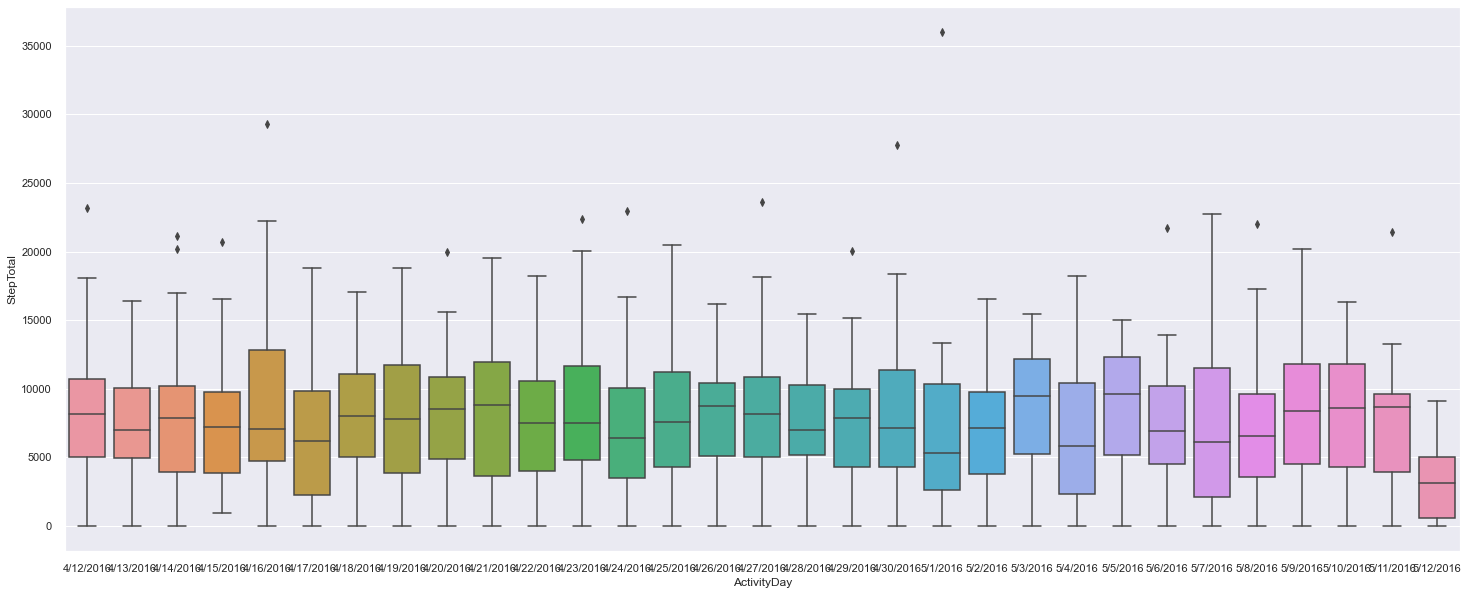

In [51]:
plt.figure(figsize = (25,10))
box1 = sns.boxplot(x = 'ActivityDay', y = 'StepTotal', data = daily_steps)

----------------------------------------------------------------------------------------------------------------------------------------------


Let's see what types of observations theese datasets contain:


In [52]:
print("-----")
print("Activity:")
for colname in list(daily_activity): print(colname, end=", ")
print("\n-----")
print("Sleep:")
for colname in list(daily_sleep): print(colname, end=", ")
print("\n-----")
print("Weight:")
for colname in list(weight_info): print(colname, end=", ")
print("\n-----")
print("Heart rate:")
for colname in list(heartrate_seconds): print(colname, end=", ")

-----
Activity:
Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories, 
-----
Sleep:
Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed, 
-----
Weight:
Id, Date, WeightKg, WeightPounds, Fat, BMI, IsManualReport, LogId, 
-----
Heart rate:
Id, Time, Value, 

It is also very important to understand how many unique users participated in data collection for each dataset:


In [53]:
print("activity:", daily_activity["Id"].nunique())
print("sleep:", daily_sleep["Id"].nunique())
print("weight:", weight_info["Id"].nunique())
print("heart rate:", heartrate_seconds["Id"].nunique())

activity: 33
sleep: 24
weight: 8
heart rate: 14


The amount of unique participants for **weight** category is very limited. To draw reliable conclusions, deeper analysis is needed.



<a id="cleaning"></a>
# Cleaning and Processing


### Formatting

In [54]:
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay']).dt.date
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']).dt.date
weight_info['Date'] = pd.to_datetime(weight_info['Date']).dt.date
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour']).dt.hour

### Merging


Now all the daily data containing information about activity and sleep can be merged into single dataset to make data manipulation and analysis easier.

In [55]:
daily_data = pd.merge(daily_activity, daily_sleep, how = "left", left_on=["Id", "ActivityDate"], right_on=["Id", "SleepDay"])
daily_data.rename({"ActivityDate":"Date"}, axis=1, inplace=True)
daily_data.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0


<a id="analysis"></a>
# Analysis and Visualizations


### Active and wear time



Users active time and wear time can be calculated using minutes spent on each activity type.

In [56]:
daily_data['ActiveTime'] = daily_data['VeryActiveMinutes'] + daily_data['FairlyActiveMinutes'] + daily_data['LightlyActiveMinutes']
daily_data['WearTime'] = daily_data['ActiveTime'] + daily_data['SedentaryMinutes']

Group the daily data by user Id to get average numbers in each observation category:

In [57]:
id_avg = daily_data.groupby(by='Id', as_index=False).mean()
id_avg.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActiveTime,WearTime
0,1503960366,12116.74,7.81,7.81,0.0,2.86e+00,0.79,4.15,0.00e+00,38.71,19.16,219.94,848.16,1816.42,1.08,360.28,383.2,277.81,1125.97
1,1624580081,5743.90,3.91,3.91,0.0,9.39e-01,0.36,2.61,6.13e-03,8.68,5.81,153.48,1257.74,1483.35,NaN,NaN,NaN,167.97,1425.71
2,1644430081,7282.97,5.30,5.30,0.0,7.30e-01,0.95,3.61,4.00e-03,9.57,21.37,178.47,1161.87,2811.30,1.00,294.00,346.0,209.40,1371.27
3,1844505072,2580.06,1.71,1.71,0.0,8.39e-03,0.05,1.65,0.00e+00,0.13,1.29,115.45,1206.61,1573.48,1.00,652.00,961.0,116.87,1323.48
4,1927972279,916.13,0.63,0.63,0.0,9.58e-02,0.03,0.51,0.00e+00,1.32,0.77,38.58,1317.42,2172.81,1.60,417.00,437.8,40.68,1358.10


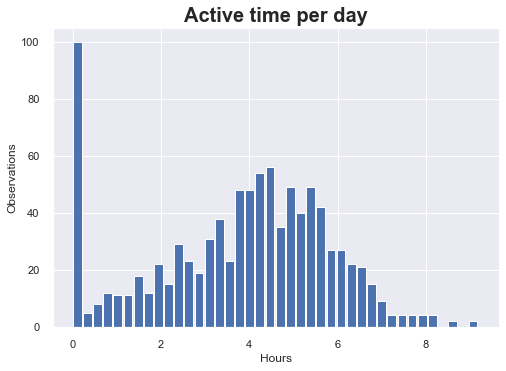

Average active time:  3.8 hours


In [58]:
(daily_data['ActiveTime']/60).hist(bins=40, width=0.2)
plt.title('Active time per day', fontweight="bold", fontsize=20)
plt.ylabel('Observations')
plt.xlabel('Hours')
plt.show()
print("Average active time: ", round(id_avg['ActiveTime'].mean()/60,1), "hours")

As shown on the histogram, users' active time per day ranges from 0 up to 9 hours, with most people being active 3-6 hours a day. There is also a large amount of observations with users having 0 recorded hours of activity. It can be explain by the fact that users sometimes forget to wear their devices or leave them to charge during the day. Fitbit can use this insight and remind users to wear their devices during the day and charge them on time.

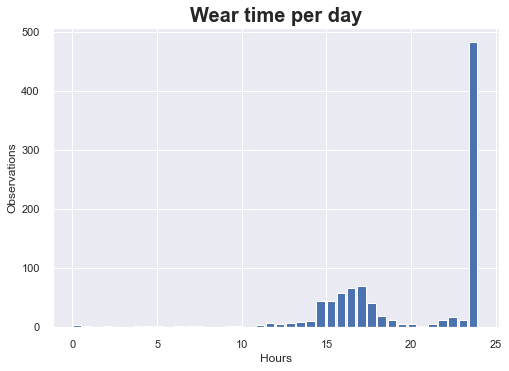

Average wear time: 20.4 hours


In [59]:
(daily_data['WearTime']/60).hist(bins=40, width=0.5)
plt.title('Wear time per day', fontweight="bold", fontsize=20)
plt.ylabel('Observations')
plt.xlabel('Hours')
plt.show()
print("Average wear time:", round(id_avg['WearTime'].mean()/60,1), "hours")

Wear time distribution shows that most of the times users wear their devices all day, with average wear time being 20.4 hours.

In [60]:
type_1 = daily_data['WearTime'][daily_data.WearTime==1440].count()
type_2 = daily_data['WearTime'][(daily_data.WearTime<1440) & (daily_data.WearTime>720)].count()
type_3 = daily_data['WearTime'][daily_data.WearTime<720].count()

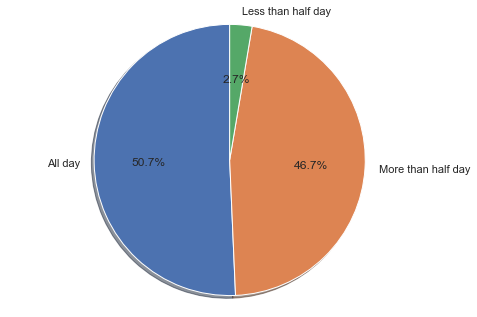

In [61]:
labels = ['All day', 'More than half day', 'Less than half day']
sizes = [type_1, type_2, type_3]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Activity distribution


On which weekdays are users are more active? :

In [62]:
daily_data['WeekdayName'] = pd.to_datetime(daily_data['Date']).dt.day_name()
daily_data['Weekday'] = pd.to_datetime(daily_data['Date']).dt.weekday

weekday_steps = daily_data[['WeekdayName','Weekday','TotalSteps']].groupby(by=['Weekday', 'WeekdayName'], as_index=False).mean()
weekday_steps.head()

,Weekday,WeekdayName,TotalSteps
0,0,Monday,7819.08
1,1,Tuesday,8125.01
2,2,Wednesday,7559.37
3,3,Thursday,7420.68
4,4,Friday,7448.23


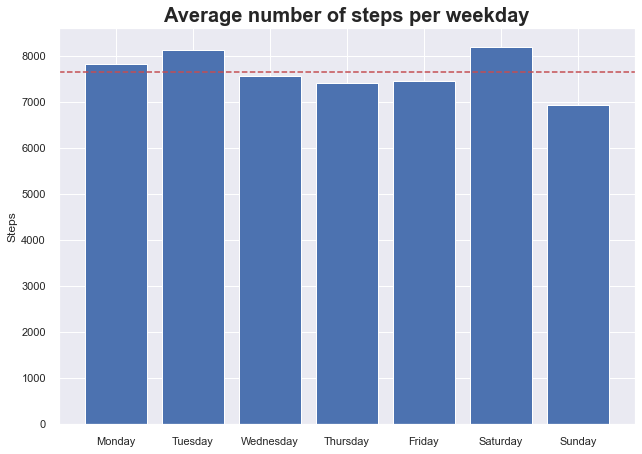

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(weekday_steps['WeekdayName'],weekday_steps['TotalSteps'])
plt.axhline(y=weekday_steps['TotalSteps'].mean(), color='r', linestyle='--')
plt.title('Average number of steps per weekday', fontweight="bold", fontsize=20)
plt.ylabel('Steps')
plt.show()

Tuesday and Saturday are the most active days, while on Sunday participants were least active. FitBit can use this insight and motivate people to do excercises consistently.

In [64]:
hourly_steps_avg = hourly_steps[['ActivityHour', 'StepTotal']].groupby(by=['ActivityHour'], as_index=False).mean()
hourly_steps_avg.rename(columns={'StepTotal':'AverageSteps'}, inplace = True)
hourly_steps_avg.head()

,ActivityHour,AverageSteps
0,0,42.19
1,1,23.10
2,2,17.11
3,3,6.43
4,4,12.70


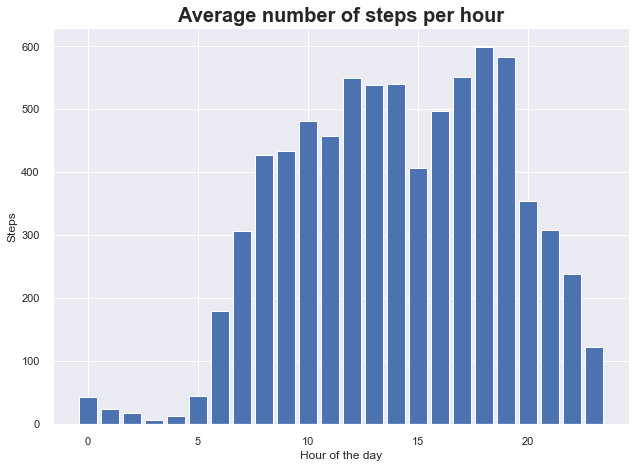

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Average number of steps per hour', fontweight="bold", fontsize=20)
plt.ylabel('Steps')
plt.xlabel('Hour of the day')
ax.bar(hourly_steps_avg['ActivityHour'],hourly_steps_avg['AverageSteps'])
plt.show()

FitBit tracks users to making most steps starting around **8 a.m.** and keep it up until **8 p.m.**. There are also much less steps being made around 3 p.m., which can be explain by people having lunch break around that time.

### Nighttime heart rate

The amount of activity that a user does on average affects heart rate at night and time spent in bed being awake. 

For that purpose, calculate average heart rate for each user at the least active time (the night hour with the minimal number of steps being made on average).

In [66]:
min_steps_hour = hourly_steps_avg['AverageSteps'].idxmin()

In [67]:
heartrate_seconds['Hour'] = pd.to_datetime(heartrate_seconds['Time']).dt.hour
heartrate_night = heartrate_seconds[heartrate_seconds.Hour == min_steps_hour][['Id','Value']]

heartrate_night_avg = heartrate_night.groupby(by='Id').mean()
heartrate_night_avg = pd.merge(id_avg[['Id', 'TotalSteps', 'Calories', 'ActiveTime']], heartrate_night_avg['Value'], how='right', on='Id')

heartrate_night_avg.rename(columns={'Value':'HeartRateAvg'}, inplace=True)
heartrate_night_avg.head()

,Id,TotalSteps,Calories,ActiveTime,HeartRateAvg
0,2347167796,9519.67,2043.44,286.56,64.16
1,4020332650,2267.23,2385.81,87.48,64.86
2,4388161847,10776.09,3087.78,272.16,52.18
3,4558609924,7685.13,2033.26,309.06,80.36
4,5553957443,8612.58,1875.68,242.61,60.17


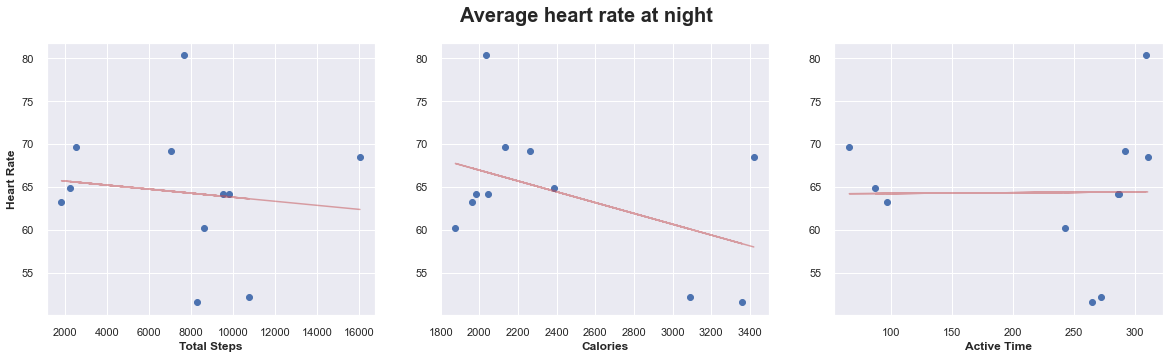

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Average heart rate at night', fontweight="bold", fontsize=20)

# Total Steps
z = np.polyfit(heartrate_night_avg['TotalSteps'], heartrate_night_avg['HeartRateAvg'], 1)
p = np.poly1d(z)
ax1.plot(heartrate_night_avg['TotalSteps'], p(heartrate_night_avg['TotalSteps']), "r-", alpha=0.5)
ax1.scatter(heartrate_night_avg['TotalSteps'], heartrate_night_avg['HeartRateAvg'])

# Calories
z = np.polyfit(heartrate_night_avg['Calories'], heartrate_night_avg['HeartRateAvg'], 1)
p = np.poly1d(z)
ax2.plot(heartrate_night_avg['Calories'], p(heartrate_night_avg['Calories']), "r-", alpha=0.5)
ax2.scatter(heartrate_night_avg['Calories'], heartrate_night_avg['HeartRateAvg'])

# Active Time
z = np.polyfit(heartrate_night_avg['ActiveTime'], heartrate_night_avg['HeartRateAvg'], 1)
p = np.poly1d(z)
ax3.plot(heartrate_night_avg['ActiveTime'], p(heartrate_night_avg['ActiveTime']), "r-", alpha=0.5)
ax3.scatter(heartrate_night_avg['ActiveTime'], heartrate_night_avg['HeartRateAvg'])

ax1.set_ylabel('Heart Rate', fontweight='bold')
ax1.set_xlabel('Total Steps', fontweight='bold')
ax2.set_xlabel('Calories', fontweight='bold')
ax3.set_xlabel('Active Time', fontweight='bold')

fig.show()

As we can see, there is little to no correlation between heart rate at night and the average amount of steps or active time. However, **there is negative correlation between te amount of calories being burned on average and the heart rate at night**.Since there are only 14 participants that submitted their heart rate data, so deeper investigation to prove the correlation is recommended.

### Time awake in bed

In [69]:
daily_data['InBedAwakeMinutes'] = daily_data['TotalTimeInBed'] - daily_data['TotalMinutesAsleep']
daily_data['InBedAwakeMinutes'] = daily_data['InBedAwakeMinutes'].astype(float)

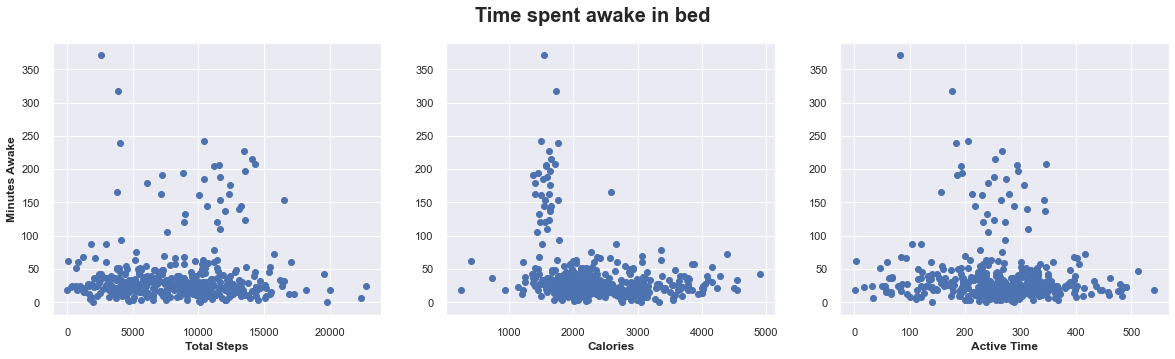

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Time spent awake in bed', fontweight="bold", fontsize=20)
ax1.scatter(daily_data['TotalSteps'],daily_data['InBedAwakeMinutes'])
ax2.scatter(daily_data['Calories'],daily_data['InBedAwakeMinutes'])
ax3.scatter(daily_data['ActiveTime'],daily_data['InBedAwakeMinutes'])

ax1.set_ylabel('Minutes Awake', fontweight='bold')
ax1.set_xlabel('Total Steps', fontweight='bold')
ax2.set_xlabel('Calories', fontweight='bold')
ax3.set_xlabel('Active Time', fontweight='bold')

fig.show()

There is little to no correlation between users' activity and their time spent awake in bed. **In most cases, participants spent less than 2 hours a day being awake in bed**. There are several outliers, which can be explained by people having insomia or spending more time in bed during weekends or due to illness.

### BMI and burned calories

To explore the relationships between these two properties use **calories burned on average per 100 steps** as a metric.

In [71]:
calories_burned = daily_data[['Id','TotalSteps','Calories']].groupby(by='Id',as_index=False).mean()
calories_burned['CaloriesPer100Steps'] = calories_burned['Calories']/(calories_burned['TotalSteps']/100)

Calculating average BMI for each participant and merging data

In [72]:
BMI_data = weight_info.groupby(by='Id', as_index=False).mean()
calories_BMI = calories_burned.merge(BMI_data[['Id','BMI']], how='right')

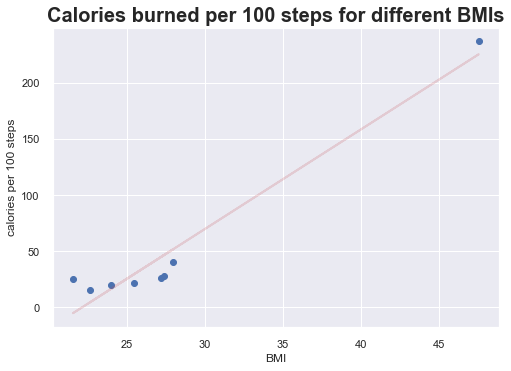

In [73]:
plt.scatter(calories_BMI['BMI'],calories_BMI['CaloriesPer100Steps'])
z = np.polyfit(calories_BMI['BMI'], calories_BMI['CaloriesPer100Steps'], 1)
p = np.poly1d(z)
plt.plot(calories_BMI['BMI'], p(calories_BMI['BMI']), linewidth=2, color='r', alpha=0.2)
plt.title('Calories burned per 100 steps for different BMIs', fontweight="bold", fontsize=20)
plt.xlabel('BMI')
plt.ylabel('calories per 100 steps')
plt.show()

It seems like there is a strong positive correlation, which means people with higher BMI tend to burn more calories for the same activity.

In [6]:
filename = 'data/database_main.xls'

data = pd.read_excel(filename, sheet_name="main", converters= {'Date': pd.to_datetime})
data.set_index(pd.to_datetime(data.Date),inplace=True)

print("Loaded db successfully!")

Loaded db successfully!


In [7]:
dayGroupedData = data.groupby(['Day of Week']).mean()
dayTypeGroupedData = data.groupby(['Is Weekday']).mean()

dayTypeGroupedData

,Unnamed: 0,Day of Week,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Elevation (Ft),Resting Heart Rate,Floors,...,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep
Is Weekday,,,,,,,,,,,,,,,,,,,,,
False,57.21,6.52,1.0,2679.55,1667.61,8789.91,5.72,33.53,61.67,11.00,...,3.40,219.25,28.90,84.05,7.65,51.90,28.85,17.75,51.75,19.75
True,57.61,2.96,0.0,2742.46,1610.05,8127.81,5.38,23.10,61.12,7.58,...,3.88,222.73,30.02,79.14,7.77,53.18,30.89,17.68,52.43,18.96


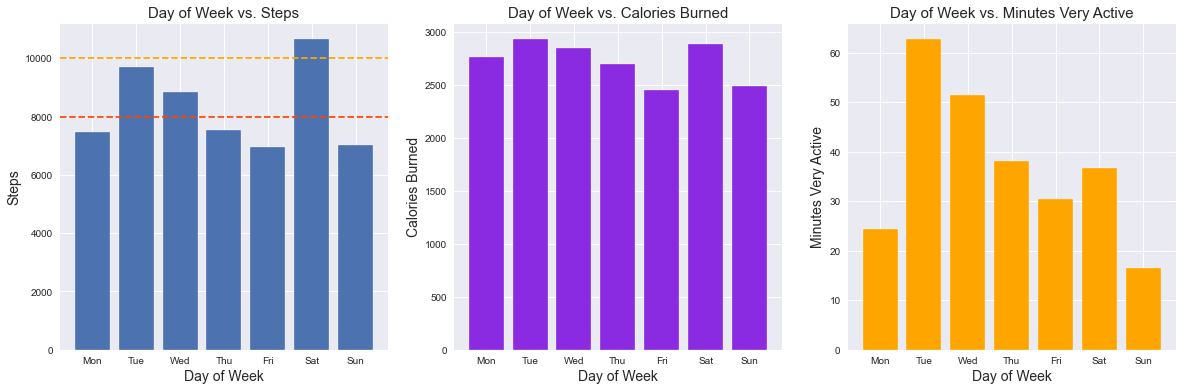

In [9]:
dayCodes = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
minDayCodes = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}



fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayGroupedData.index, dayGroupedData['Steps'])
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')
ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData.index, dayGroupedData['Calories Burned'], color='blueviolet')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dayGroupedData.index, dayGroupedData['Minutes Very Active'], color='orange')
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)
plt.show()

The graphs above suggest that the average is about 7800 steps per day.There are some studies which suggest hitting 10000 steps per day is ideal.

Tuesdays to Saturdays were the days where the average was about 40 minutes of very active minutes - which simply translates to active exercise. Fewer minutes on Sundays could be purely due to laziness/recovery time. The drop in active minutes on Mondays could be due to the Monday Blues which is an obvious trend observed.

,Time,avgBPM,maxBPM,Calories burned,Steps,Cal/Min
Activity Type,,,,,,
Fitbit Coach,10.00,131.0,149.0,86.00,5.0,8.60
Running,9.00,149.0,183.0,107.00,1202.0,11.82
Squash,44.00,139.0,170.0,427.00,4366.0,9.70
Swim,20.33,0.0,0.0,77.67,97.0,3.88
Tennis,35.00,144.0,176.0,357.00,2507.0,10.20
Walk,20.00,121.0,164.0,182.00,2239.0,9.10
Weight training,21.00,136.0,166.0,203.00,100.0,9.67


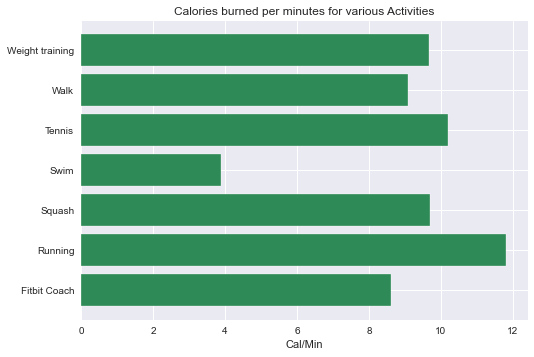

In [10]:
activityDf = pd.read_excel(filename, sheet_name="activities")
#skateboard,badminton, body weight ex, cyclinng
activityDf['Cal/Min'] = activityDf['Calories burned']/activityDf['Time']
groupedActivitiesDf = activityDf.groupby(['Activity Type']).mean()

#Plot Data
plt.barh(groupedActivitiesDf.index, groupedActivitiesDf['Cal/Min'], color='seagreen')
plt.title('Calories burned per minutes for various Activities')
plt.xlabel('Cal/Min')
plt.plot()

groupedActivitiesDf

Analysing the amount of calories burned per minutes for various Activities shows the above graph formed.

It can be inferred that running helps burn almost 12 calories per minute.

Tennis - one of the favourite activities from the lot - takes the second spot.

Swimming numbers are not shocking as the exercise turns out to be a leisure activity.


## Calorie burn co-orelation

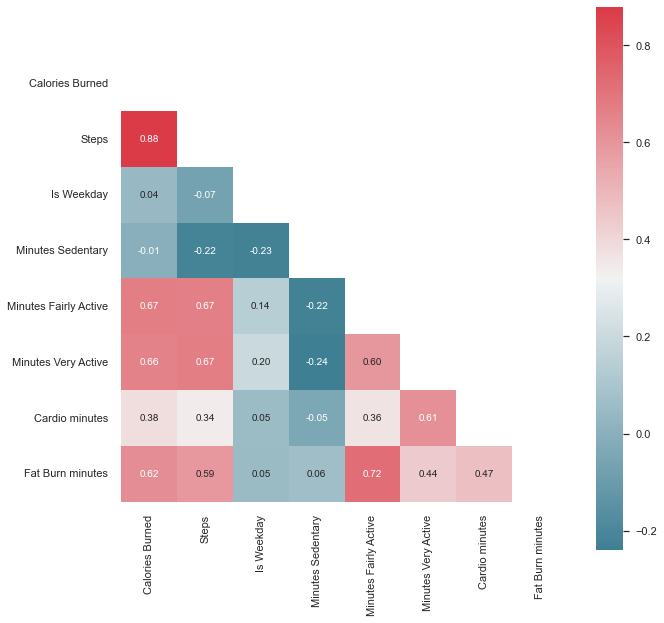

In [13]:
def plot_heatmap(corrmat, correlationOf, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

correlationOf = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekday', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes']]
plot_heatmap(corrdf_calories.corr(), correlationOf, '')

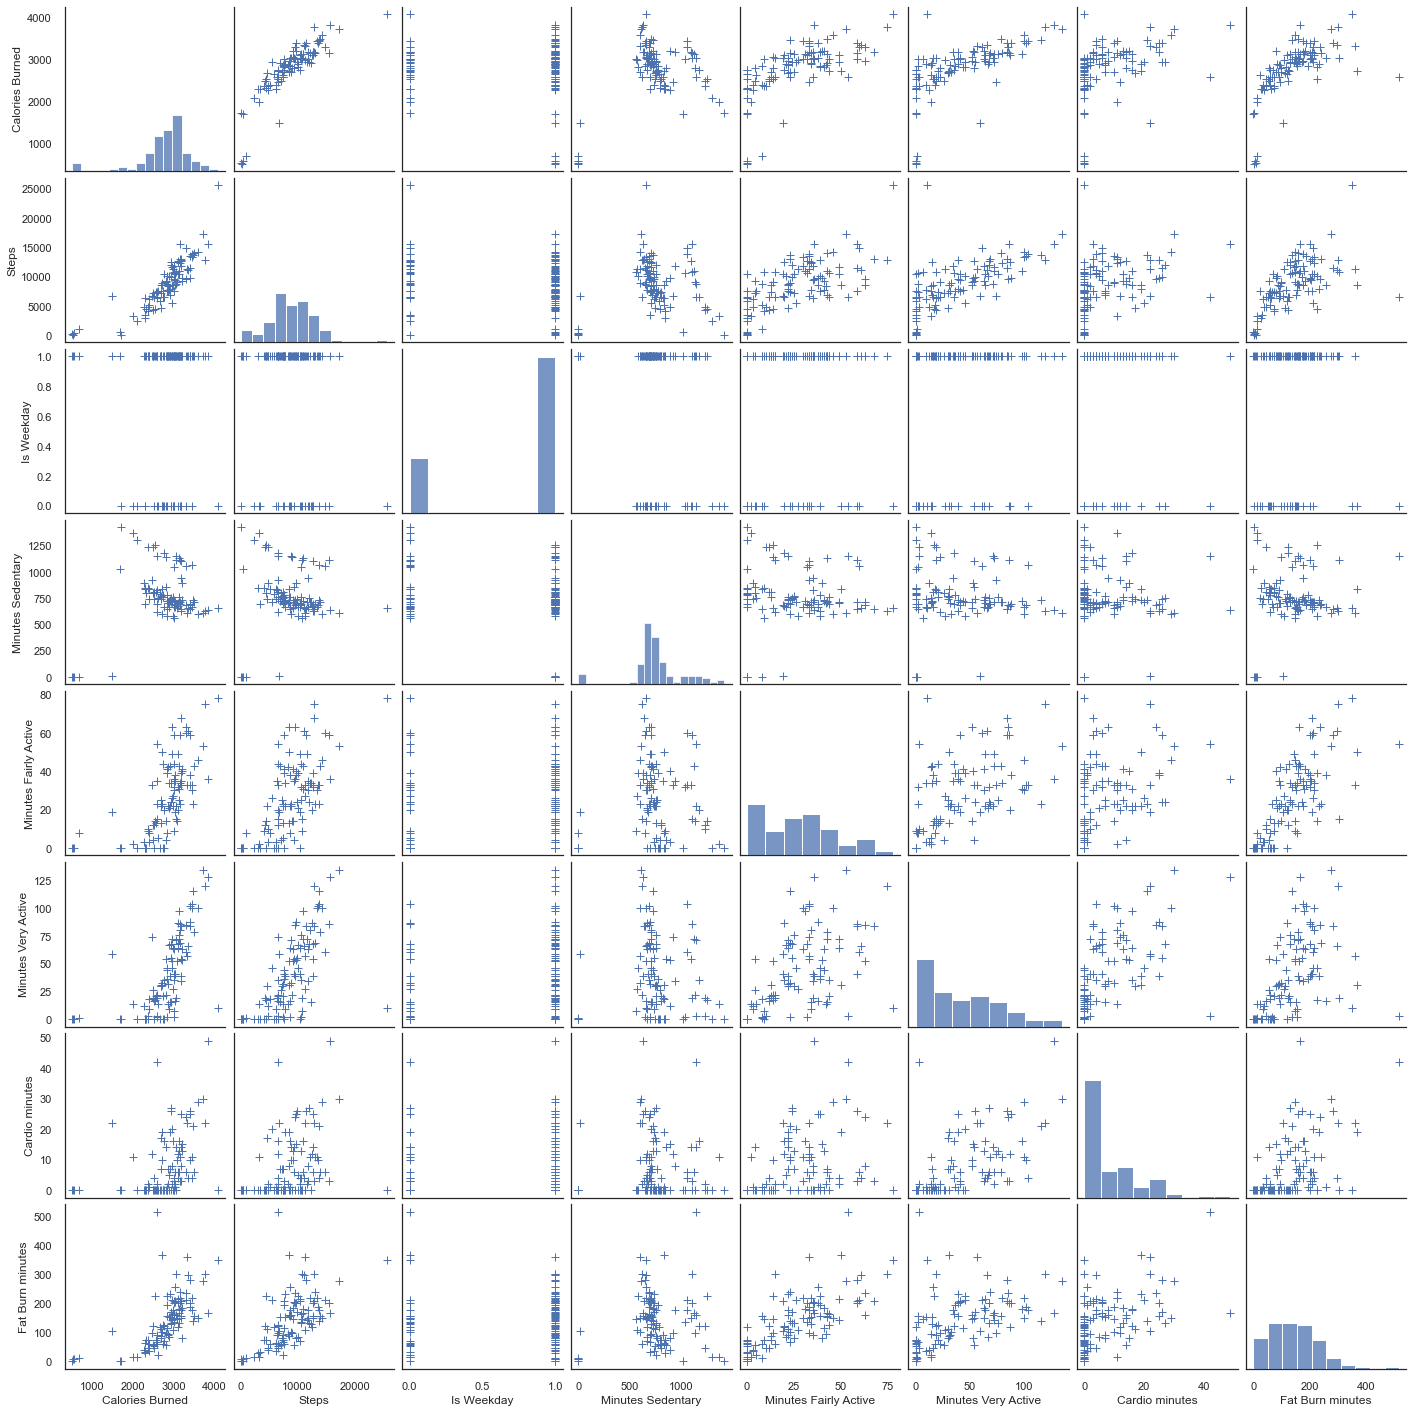

In [14]:
# Basic correlogram
sns.pairplot(corrdf_calories.dropna(), kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

The calories burned is strongly related to amount of steps and active minutes. Minutes sedentary has a negative correlation with Weekdays which implies that more time is spent slacking off on weekends.

## Sleep on various days of the week using box-plot

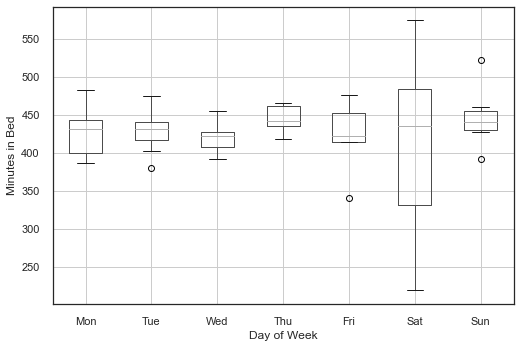

In [15]:
sleepData = data[data['% Deep sleep'].notnull()]

ax = sleepData.boxplot(column = 'Time in bed', by = 'Day of Week')
ax.set_xticklabels(minDayCodes[1:])
plt.ylabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

The rest of the days are straighforward with lesser deviations but from the looks of it, Saturday is when the sleep time is drastically more.

<a id="conclusions"></a>
# Conclusions and Recommendations

Here are the key takeaways from the performed analysis:
1. Average user's active time per day:  **3.8 hours**. Average user's wear time per day: **20.4 hours**. There is also a large amount of observations with users having 0 recorded hours of activity.

    *Recommendation*: FitBit can remind users to wear their devices during the day and charge them on time.
2. *Tuesday and Saturday* are the **most** active days, while on *Sunday* participants were **least** active.

    *Recommendation*: FitBit can motivate people to do excercises consistently throughout the week.
3. Fitness trackers users make most steps starting around **8 a.m.** and keep it up until **8 p.m.**. There are also much less steps being made around 3 p.m., which can be explain by people having lunch break around that time.

4. There is **little to no correlation** between *heart rate at night* and the *average amount of steps or active time*. However, there is **negative correlation** between the *amount of calories being burned on average* and *the heart rate at night*. Further analysis recommended due to limited data entries.

5. Users mostly spend **2 hours per day** being awake in bed. There is **little to no correlation** between *users' activity* and their *time spent awake in bed*.

    *Recommendation*: FitBit can remind users to wake up if they lay in a bed for too long, or promote healthy sleep habits if consistent sleep problems were found. 

6. Users with higher BMI tend to **burn more calories** for the same activity. Further analysis recommended due to limited data entries.